In [ ]:
#Load dataset
import pandas as pd
data=pd.read_csv("/content/Housing Price Dataset.csv")
print("Dataset Info")
data.info()
print("First 10 rows")
print(data.head(10))
print("Description")
print(data.describe())

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
First 10 rows
      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        

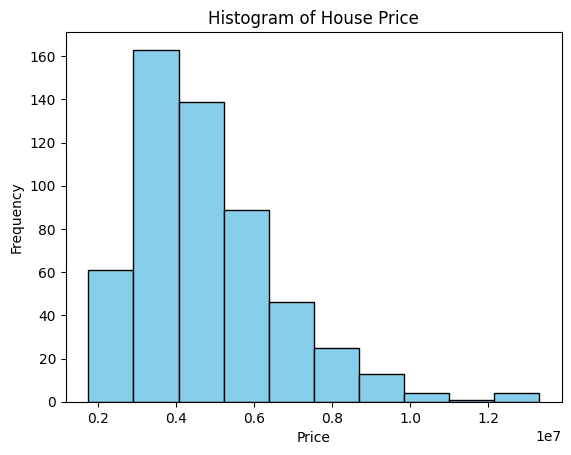

In [ ]:
#1 Histogram of house_price
import matplotlib.pyplot as plt
plt.hist(data['house_price'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of House Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#2 Handle missing values using mean and median
import pandas as pd
missing_rows=data[data.isnull().any(axis=1)]
print("Before cleaning")
print(missing_rows)
data_mean=data.fillna(data.mean(numeric_only=True))
print("After mean filling")
print(data_mean.loc[missing_rows.index])
data_median=data.fillna(data.median(numeric_only=True))
print("After median filling")
print(data_median.loc[missing_rows.index])

Before cleaning
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []
After mean filling
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []
After median filling
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [ ]:
#3 Remove duplicate records
import pandas as pd
duplicates=data[data.duplicated()]
print("Duplicate records")
print(duplicates)
data_no_duplicates=data.drop_duplicates()
print("After removing duplicates")
print(data_no_duplicates.head(10))

Duplicate records
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []
After removing duplicates
      price   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000   7420         4          2        3      yes        no       no   
1  12250000   8960         4          4        4      yes        no       no   
2  12250000   9960         3          2        2      yes        no      yes   
3  12215000   7500         4          2        2      yes        no      yes   
4  11410000   7420         4          1        2      yes       yes      yes   
5  10850000   7500         3          3        1      yes        no      yes   
6  10150000   8580         4          3        4      yes        no       no   
7  10150000  16200         5          3        2      yes        no       no   
8   9870000   8100         4          1        2      y

In [ ]:
#4 Outlier detection using IQR
import pandas as pd
Q1=data['price'].quantile(0.25)
Q3=data['price'].quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
outliers=data[(data['price']<lower)|(data['price']>upper)]
print("Outliers")
print(outliers[['price']])
data_no_outliers=data[(data['price']>=lower)&(data['price']<=upper)]
print("After removing outliers")
print(data_no_outliers['price'].head(10))


Outliers
       price
0   13300000
1   12250000
2   12250000
3   12215000
4   11410000
5   10850000
6   10150000
7   10150000
8    9870000
9    9800000
10   9800000
11   9681000
12   9310000
13   9240000
14   9240000
After removing outliers
15    9100000
16    9100000
17    8960000
18    8890000
19    8855000
20    8750000
21    8680000
22    8645000
23    8645000
24    8575000
Name: price, dtype: int64


In [ ]:
#5 Text data cleaning (lowercase and strip)
import pandas as pd
print("Before cleaning")
print(data['furnishingstatus'].head(10))
data['furnishing_clean']=data['furnishingstatus'].str.lower().str.strip()
print("After cleaning")
print(data['furnishing_clean'].unique())

Before cleaning
0         furnished
1         furnished
2    semi-furnished
3         furnished
4         furnished
5    semi-furnished
6    semi-furnished
7       unfurnished
8         furnished
9       unfurnished
Name: furnishingstatus, dtype: object
After cleaning
['furnished' 'semi-furnished' 'unfurnished']


In [ ]:
#6 Rename columns
import pandas as pd
print("Before renaming")
print(data.columns)
data=data.rename(columns={"price":"house_price","area":"house_area","bedrooms":"no_of_bedrooms","bathrooms":"no_of_bathrooms"})
print("After renaming")
print(data.columns)

Before renaming
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'furnishing_clean'],
      dtype='object')
After renaming
Index(['house_price', 'house_area', 'no_of_bedrooms', 'no_of_bathrooms',
       'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus',
       'furnishing_clean'],
      dtype='object')


In [ ]:
#7 Data type conversion
print("Before conversion")
print(data.dtypes)
data['no_of_bedrooms']=data['no_of_bedrooms'].astype(int)
data['no_of_bathrooms']=data['no_of_bathrooms'].astype(int)
print("After conversion")
print(data.dtypes)

Before conversion
house_price          int64
house_area           int64
no_of_bedrooms       int64
no_of_bathrooms      int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
furnishing_clean    object
dtype: object
After conversion
house_price          int64
house_area           int64
no_of_bedrooms       int64
no_of_bathrooms      int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
furnishing_clean    object
dtype: object


In [ ]:
#8 Standard scaling
print("Before scaling")
print(data['house_area'].head(10))
data['house_area_scaled']=(data['house_area']-data['house_area'].mean())/data['house_area'].std()
print("After scaling")
print(data[['house_area','house_area_scaled']].head(10))

Before scaling
0     7420
1     8960
2     9960
3     7500
4     7420
5     7500
6     8580
7    16200
8     8100
9     5750
Name: house_area, dtype: int64
After scaling
   house_area  house_area_scaled
0        7420           1.045766
1        8960           1.755397
2        9960           2.216196
3        7500           1.082630
4        7420           1.045766
5        7500           1.082630
6        8580           1.580293
7       16200           5.091586
8        8100           1.359109
9        5750           0.276230


In [ ]:
#9 Normalization
print("Before normalization")
print(data['house_price'].head(10))
data['house_price_normalized']=(data['house_price']-data['house_price'].min())/(data['house_price'].max()-data['house_price'].min())
print("After normalization")
print(data[['house_price','house_price_normalized']].head(10))

Before normalization
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
5    10850000
6    10150000
7    10150000
8     9870000
9     9800000
Name: house_price, dtype: int64
After normalization
   house_price  house_price_normalized
0     13300000                1.000000
1     12250000                0.909091
2     12250000                0.909091
3     12215000                0.906061
4     11410000                0.836364
5     10850000                0.787879
6     10150000                0.727273
7     10150000                0.727273
8      9870000                0.703030
9      9800000                0.696970


In [ ]:
#10 Binning
data['price_category']=pd.cut(data['house_price'],bins=[0,3000000,6000000,data['house_price'].max()],labels=['Low','Medium','High'])
print(data[['house_price','price_category']].head(10))

   house_price price_category
0     13300000           High
1     12250000           High
2     12250000           High
3     12215000           High
4     11410000           High
5     10850000           High
6     10150000           High
7     10150000           High
8      9870000           High
9      9800000           High


In [ ]:
#11 Aggregation
agg=data.groupby('no_of_bedrooms')['house_price'].mean()
print(agg)

no_of_bedrooms
1    2.712500e+06
2    3.632022e+06
3    4.954598e+06
4    5.729758e+06
5    5.819800e+06
6    4.791500e+06
Name: house_price, dtype: float64


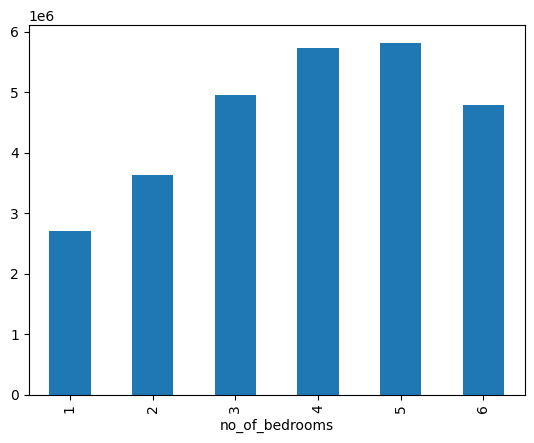

In [ ]:
#12 Bar chart
import matplotlib.pyplot as plt
bar_data=data.groupby('no_of_bedrooms')['house_price'].mean()
bar_data.plot(kind='bar')
plt.show()

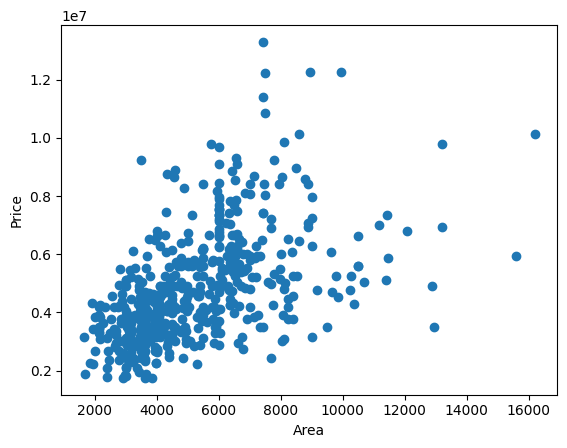

In [ ]:
#13 Scatter plot
import matplotlib.pyplot as plt
plt.scatter(data['house_area'],data['house_price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [ ]:
#14 One hot encoding
one_hot=pd.get_dummies(data['furnishingstatus'])
data_onehot=pd.concat([data,one_hot],axis=1)
print(data_onehot.head(10))

   house_price  house_area  no_of_bedrooms  no_of_bathrooms  stories mainroad  \
0     13300000        7420               4                2        3      yes   
1     12250000        8960               4                4        4      yes   
2     12250000        9960               3                2        2      yes   
3     12215000        7500               4                2        2      yes   
4     11410000        7420               4                1        2      yes   
5     10850000        7500               3                3        1      yes   
6     10150000        8580               4                3        4      yes   
7     10150000       16200               5                3        2      yes   
8      9870000        8100               4                1        2      yes   
9      9800000        5750               3                2        4      yes   

  guestroom basement hotwaterheating airconditioning  parking prefarea  \
0        no       no              

In [ ]:
#15 Dummy variables
dummy=pd.get_dummies(data['mainroad'],drop_first=True)
data_dummy=pd.concat([data,dummy],axis=1)
print(data_dummy.head(10))

   house_price  house_area  no_of_bedrooms  no_of_bathrooms  stories mainroad  \
0     13300000        7420               4                2        3      yes   
1     12250000        8960               4                4        4      yes   
2     12250000        9960               3                2        2      yes   
3     12215000        7500               4                2        2      yes   
4     11410000        7420               4                1        2      yes   
5     10850000        7500               3                3        1      yes   
6     10150000        8580               4                3        4      yes   
7     10150000       16200               5                3        2      yes   
8      9870000        8100               4                1        2      yes   
9      9800000        5750               3                2        4      yes   

  guestroom basement hotwaterheating airconditioning  parking prefarea  \
0        no       no              

In [ ]:
#16 Label encoding
data['furnishing_label']=data['furnishingstatus'].astype('category').cat.codes
print(data[['furnishingstatus','furnishing_label']].head(10))

  furnishingstatus  furnishing_label
0        furnished                 0
1        furnished                 0
2   semi-furnished                 1
3        furnished                 0
4        furnished                 0
5   semi-furnished                 1
6   semi-furnished                 1
7      unfurnished                 2
8        furnished                 0
9      unfurnished                 2


In [ ]:
#17 Lower casing text
data['mainroad_lower']=data['mainroad'].str.lower()
print(data[['mainroad','mainroad_lower']].head(10))

  mainroad mainroad_lower
0      yes            yes
1      yes            yes
2      yes            yes
3      yes            yes
4      yes            yes
5      yes            yes
6      yes            yes
7      yes            yes
8      yes            yes
9      yes            yes


In [ ]:
#18 Remove punctuation
import string
data['furnishing_nopunct']=data['furnishingstatus'].str.replace('[{}]'.format(string.punctuation),'',regex=True)
print(data[['furnishingstatus','furnishing_nopunct']].head(10))

  furnishingstatus furnishing_nopunct
0        furnished          furnished
1        furnished          furnished
2   semi-furnished      semifurnished
3        furnished          furnished
4        furnished          furnished
5   semi-furnished      semifurnished
6   semi-furnished      semifurnished
7      unfurnished        unfurnished
8        furnished          furnished
9      unfurnished        unfurnished


In [ ]:
#19 Tokenization
data['furnishing_tokens']=data['furnishingstatus'].str.split()
print(data[['furnishingstatus','furnishing_tokens']].head(10))

  furnishingstatus furnishing_tokens
0        furnished       [furnished]
1        furnished       [furnished]
2   semi-furnished  [semi-furnished]
3        furnished       [furnished]
4        furnished       [furnished]
5   semi-furnished  [semi-furnished]
6   semi-furnished  [semi-furnished]
7      unfurnished     [unfurnished]
8        furnished       [furnished]
9      unfurnished     [unfurnished]


In [ ]:
#20 Feature scaling multiple columns
data['house_price_scaled']=(data['house_price']-data['house_price'].mean())/data['house_price'].std()
data['house_area_scaled']=(data['house_area']-data['house_area'].mean())/data['house_area'].std()
data['bedrooms_scaled']=(data['no_of_bedrooms']-data['no_of_bedrooms'].mean())/data['no_of_bedrooms'].std()
print(data[['house_price','house_price_scaled','house_area','house_area_scaled','no_of_bedrooms','bedrooms_scaled']].head(10))

   house_price  house_price_scaled  house_area  house_area_scaled  \
0     13300000            4.562174        7420           1.045766   
1     12250000            4.000809        8960           1.755397   
2     12250000            4.000809        9960           2.216196   
3     12215000            3.982096        7500           1.082630   
4     11410000            3.551716        7420           1.045766   
5     10850000            3.252321        7500           1.082630   
6     10150000            2.878078        8580           1.580293   
7     10150000            2.878078       16200           5.091586   
8      9870000            2.728380        8100           1.359109   
9      9800000            2.690956        5750           0.276230   

   no_of_bedrooms  bedrooms_scaled  
0               4         1.402131  
1               4         1.402131  
2               3         0.047235  
3               4         1.402131  
4               4         1.402131  
5               3 